In [1]:
import numpy as np
from src.base_problem import BaseProblem

In [2]:
class MSE_L2_problem(BaseProblem):
    def __init__(self, A, b, lmbd):
        self.A = A
        self.b = b
        self.lmbd = lmbd

    def grad_f(self, x):
        return self.A.T @ (self.A @ x - self.b)

    def prox(self, x, gamma):
        y = np.copy(x)
        y *= gamma / (self.lmbd + gamma)
        return y

    def prox_jacob(self, x, gamma, C):
        y = np.full(x.shape, gamma / (self.lmbd + gamma)).reshape(-1, 1)
        return y * C

    def phi(self, x):
        return 0.5 * self.lmbd * (x @ x)

    def psi(self, x):
        r = self.A @ x - self.b
        return 0.5 * (r @ r) + self.phi(x)

    def crit(self, x):
        return np.linalg.norm(self.prox(x - self.grad_f(x), 1) - x)

In [3]:
from src.config import RPQN_config

In [4]:
config = RPQN_config()

In [5]:
n = 1000
m = 2000

A_sys = np.random.randn(m, n)
b = np.random.randn(m)

x0 = np.zeros(n)

In [6]:
lmbd = 0.1

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=(lmbd / m), l1_ratio=0, fit_intercept=False, tol=1e-16, max_iter=10000, selection='random')
model.fit(A_sys, b)
x_true = np.copy(model.coef_)

/home/konst/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.645e+02, tolerance: 1.912e-13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [7]:
from src.rpqn import RPQN

In [8]:
x_hst, x_final, crit_list, func_diff_list = RPQN(config, MSE_L2_problem(A_sys, b, lmbd), x0, x_true)

 36%|███▌      | 71/200 [00:06<00:11, 11.46it/s]

mu=2.0


In [10]:
import matplotlib.pyplot as plt

/home/konst/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


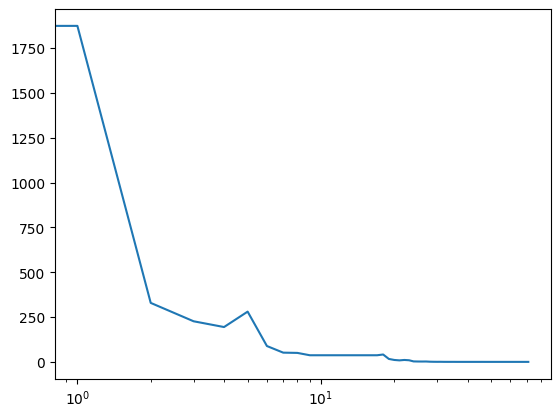

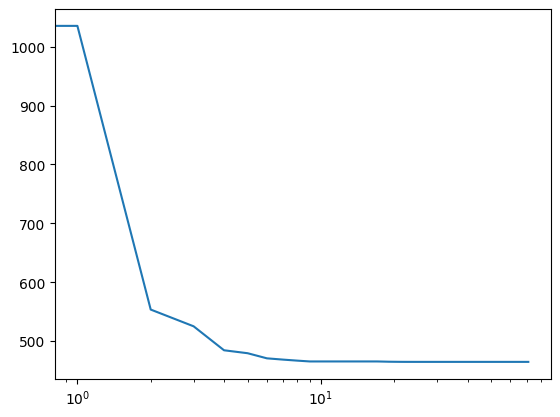

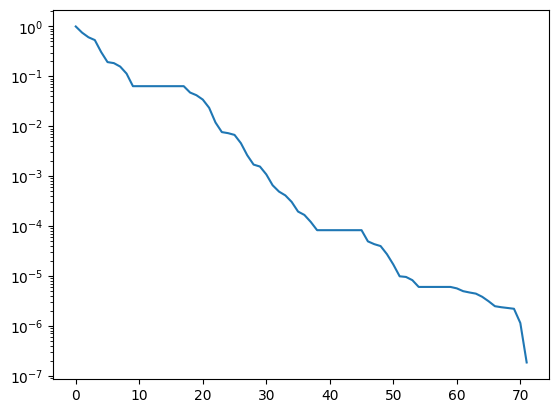

In [12]:
plt.semilogx(crit_list, label='Criterion')
plt.show()
plt.semilogx(func_diff_list, label='Function \psi')
plt.show()
plt.semilogy(x_hst, label='Residual')

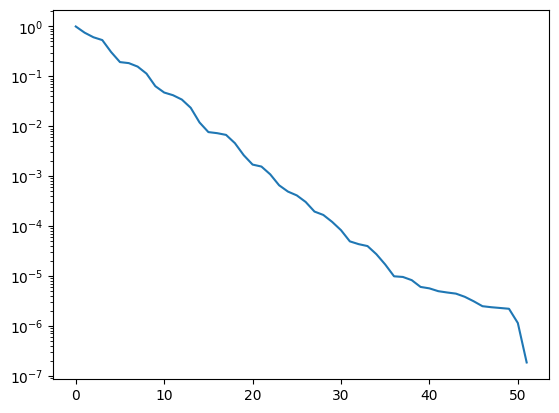

In [ ]:
# Plot of residuals with dropped unsuccessful steps
x_arr = np.array(x_hst)
a = np.concat([x_arr[:-1][x_arr[:-1] != x_arr[1:]], x_arr[-1:]])
plt.semilogy(a)